In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Activation, Flatten, Dense, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras import regularizers
from keras.models import load_model
from keras.utils.vis_utils import plot_model


#from keras.layers.convolutional import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

/home/manish/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [18]:
model1 = load_model('model_rgb_norm1.h5')

In [10]:
X_test = np.load('test_npy_dataset/X.npy')
Y_test = np.load('test_npy_dataset/Y.npy')

In [11]:
print(X_test.shape)
print(Y_test.shape)

(662, 100, 100, 3)
(662, 11)


In [19]:
model1.evaluate(X_test,Y_test)

662/662 [==============================] - 1s 1ms/step


[13.932836912910023, 0.13595166163141995]

In [9]:
model1.metrics_names

['loss', 'acc']

In [7]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG


SVG(model_to_dot(model1).create(prog='dot', format='svg'))

['dot', '-Tps', '/tmp/tmpLKqjoB'] return code: -11

stdout, stderr:
 




AssertionError: -11

In [5]:
plot_model(model1, to_file='images/model_rgb.png', show_shapes=True, show_layer_names=True)

In [2]:
X = np.load("npy_dataset/X.npy")
Y = np.load("npy_dataset/Y.npy")

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.10, random_state=1)

In [4]:
model = load_model('model_rgb.h5')

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)


In [6]:
print(score)

[0.2244164610747248, 0.958984375]


In [12]:
from vis.visualization import visualize_activation
from vis.visualization import visualize_saliency

from vis.utils import utils
from keras import activations

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
#layer_idx = utils.find_layer_idx(model, 'preds')
layer_idx = -1
# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)



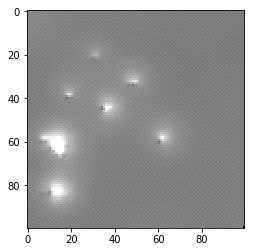

In [8]:
# This is the output node we want to maximize.
filter_idx = 5
img = visualize_activation(model, layer_idx, filter_indices=filter_idx)
plt.imshow(img[..., 0],cmap='gray')

In [24]:
# # This corresponds to the Dense linear layer.
# for class_idx in np.arange(10):    
#     indices = np.where(y_test[:, class_idx] == 1.)[0]
#     idx = indices[0]

#     f, ax = plt.subplots(1, 3)
#     ax[0].imshow(x_test[idx][..., 0])
    
#     for i, modifier in enumerate([None, 'relu']):
#         grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, 
#                                    seed_input=x_test[idx], backprop_modifier=modifier)
#         if modifier is None:
#             modifier = 'vanilla'
#         ax[i+1].set_title(modifier)    
#         ax[i+1].imshow(grads, cmap='jet')


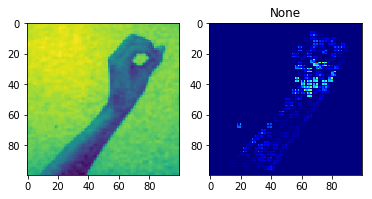

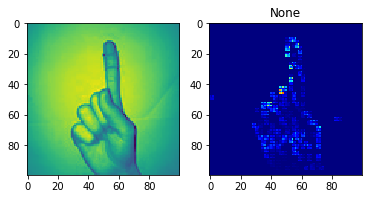

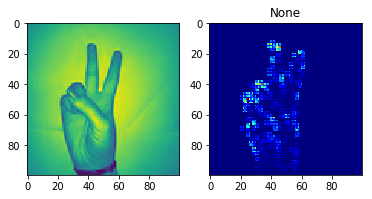

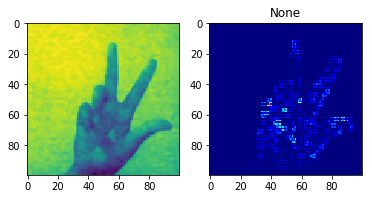

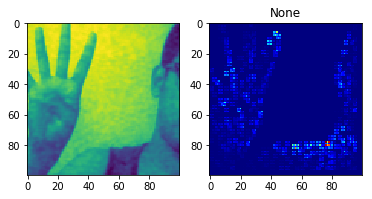

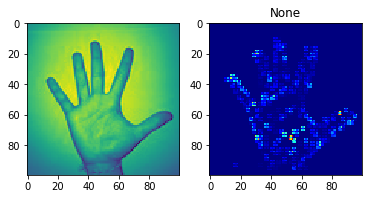

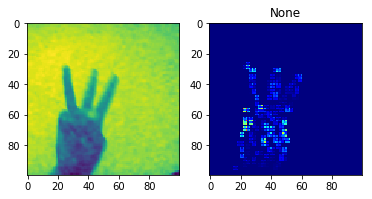

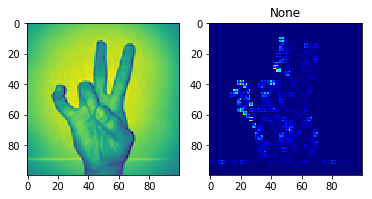

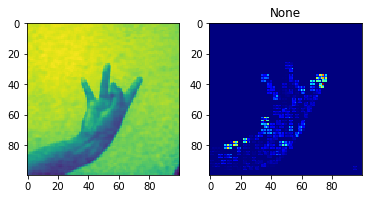

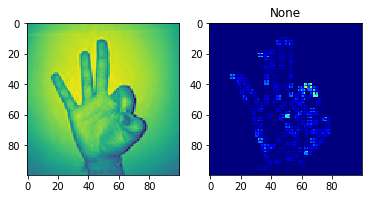

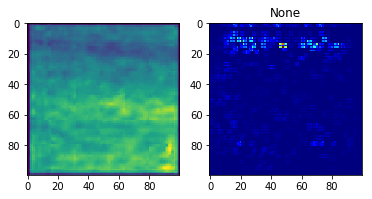

In [10]:

# This corresponds to the Dense linear layer.
for class_idx in np.arange(11):    
    indices = np.where(y_test[:, class_idx] == 1.)[0]
    idx = indices[0]

    f, ax = plt.subplots(1, 2)
    ax[0].imshow(x_test[idx][..., 0])
    
    modifier = None
    
    grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, 
                                  seed_input=x_test[idx], backprop_modifier=modifier)

    ax[1].set_title(str(modifier))    
    ax[1].imshow(grads, cmap='gray')


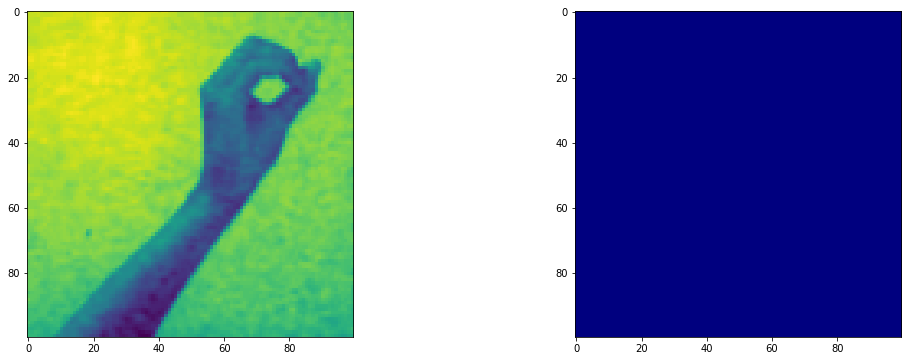

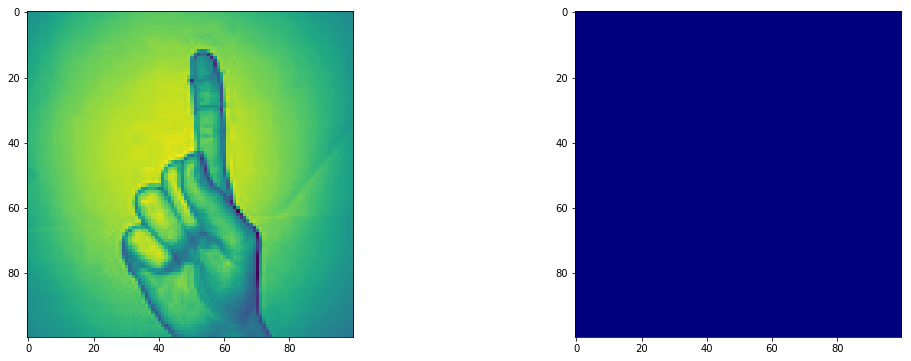

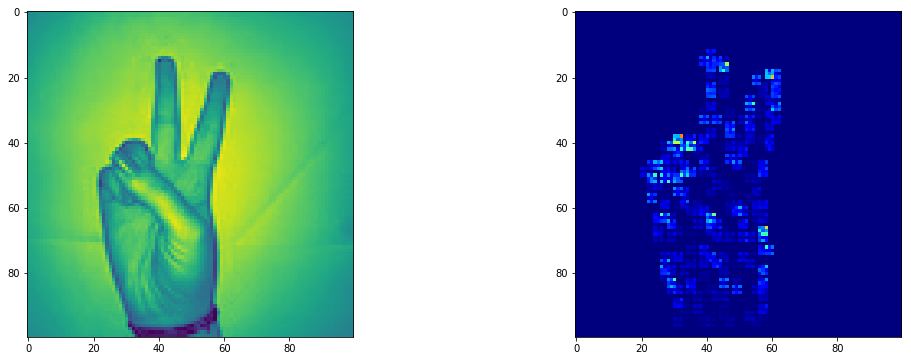

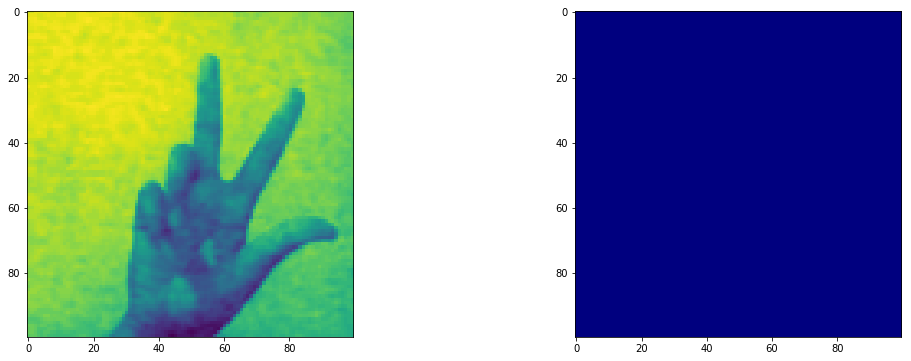

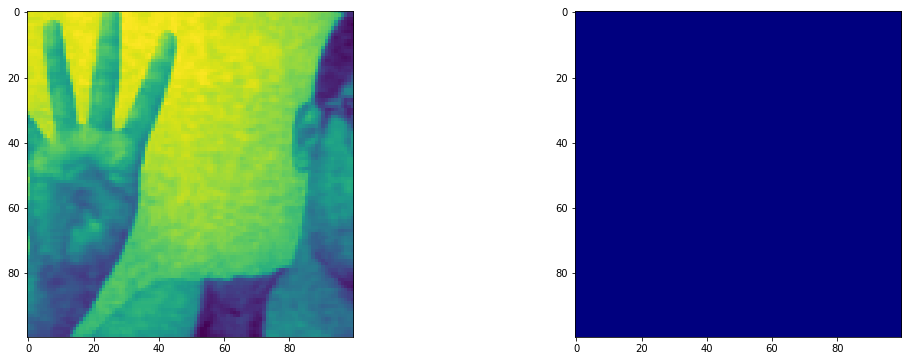

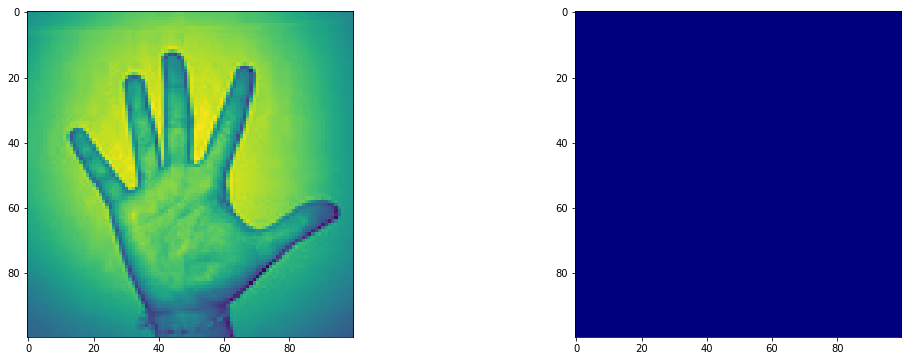

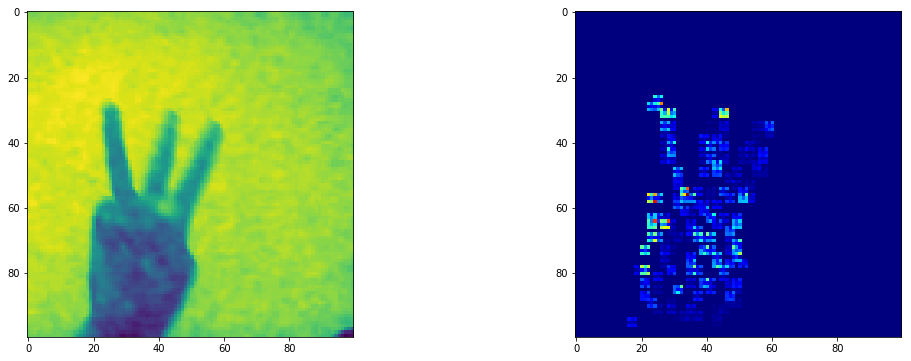

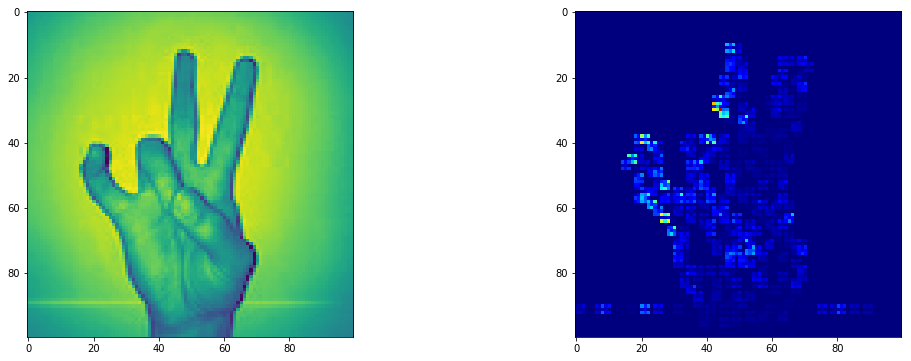

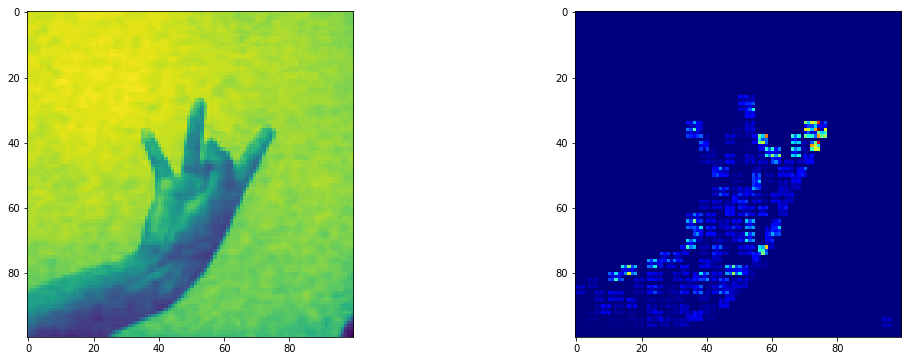

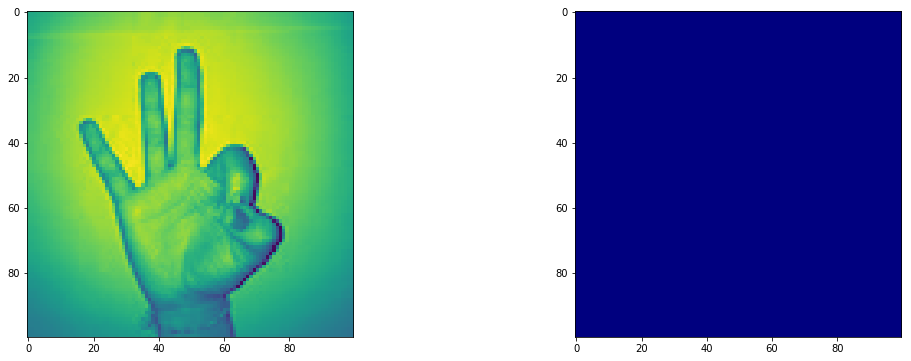

In [26]:
# Swap linear back with softmax
model.layers[layer_idx].activation = activations.softmax
model = utils.apply_modifications(model)

for class_idx in np.arange(10):    
    indices = np.where(y_test[:, class_idx] == 1.)[0]
    idx = indices[0]
    
    grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, 
                               seed_input=x_test[idx], backprop_modifier=None)

    f, ax = plt.subplots(1, 2)
    ax[0].imshow(x_test[idx][..., 0])
    ax[1].imshow(grads, cmap='jet')

In [27]:
#!set KERAS_BACKEND = tensorflow

In [28]:
#from keras import backend as b

In [29]:
#b.backend()